In [ ]:
# Regressão linear múltipla v2 -> Melissa 280125

In [2]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

# Carregamento da base de dados e exclusão da primeiro coluna
base = pd.read_csv('mt_cars.csv')
base = base.drop(['Unnamed: 0'], axis=1)  # Excluindo a coluna desnecessária

In [3]:
# Criação de X e Y: variável independente e variável dependente
X = base.iloc[:, 2].values  # coluna disp
y = base.iloc[:, 0].values  # coluna mpg


In [4]:
# Mudança do formato de X para o formato de matriz (necessário para versões mais recentes do sklearn)
X = X.reshape(-1, 1)


In [5]:
# Criação do modelo, treinamento, visualização dos coeficientes e do score do modelo
modelo = LinearRegression()
modelo.fit(X, y)


LinearRegression()

In [6]:
# Interceptação (coeficiente linear)
print("Interceptação:", modelo.intercept_)


Interceptação: 29.59985475616395


In [7]:
# Inclinação (coeficiente angular)
print("Inclinação:", modelo.coef_)


Inclinação: [-0.04121512]


In [8]:
# R^2 (score do modelo)
print("R^2:", modelo.score(X, y))


R^2: 0.7183433404897299


In [9]:
# Geração das previsões
previsoes = modelo.predict(X)
print("Previsões:", previsoes)


Previsões: [23.00543556 23.00543556 25.1486218  18.96635381 14.76241157 20.32645276
 14.76241157 23.55359666 23.79676587 22.69220065 22.69220065 18.23272467
 18.23272467 18.23272467 10.14631813 10.64089957 11.46520197 26.35622482
 26.47987017 26.66945973 24.64991885 16.49344661 17.07045829 15.17456277
 13.11380677 26.34386028 24.64167582 25.68029685 15.13334765 23.62366236
 17.19410365 24.61282524]


In [10]:
# Criação do modelo ajustado com statsmodels (regressão linear simples)
modelo_ajustado = sm.ols(formula='mpg ~ disp', data=base)
modelo_treinado = modelo_ajustado.fit()
print(modelo_treinado.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           9.38e-10
Time:                        14:37:59   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.0

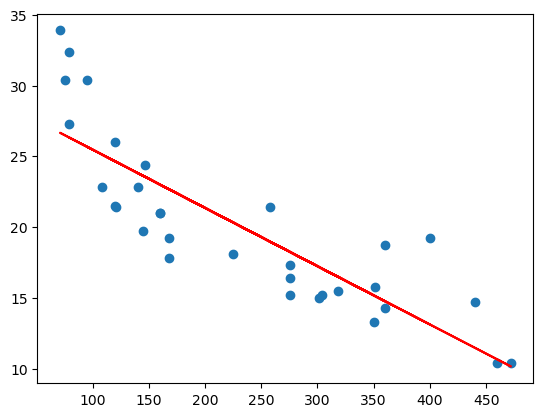

In [11]:
# Visualização dos resultados
plt.scatter(X, y)
plt.plot(X, previsoes, color='red')
plt.show()


In [12]:
# Previsão para somente um valor
print("Previsão para um novo valor (200):", modelo.predict([[200]]))


Previsão para um novo valor (200): [21.35683076]


In [13]:
# Criação de novas variáveis X1 e Y1 e novo modelo para comparação com o anterior
X1 = base.iloc[:, 1:4].values  # Usando 'cyl', 'disp', 'hp' como variáveis independentes
y1 = base.iloc[:, 0].values  # 'mpg' como variável dependente


In [14]:
# Criando o modelo e treinando
modelo2 = LinearRegression()
modelo2.fit(X1, y1)


LinearRegression()

In [15]:
# R^2 para o modelo múltiplo
print("R^2 para o modelo múltiplo:", modelo2.score(X1, y1))


R^2 para o modelo múltiplo: 0.7678877440928638


In [16]:
# Previsão de um novo registro com o modelo múltiplo
novo = np.array([4, 200, 100])  # Novo valor para 'cyl', 'disp', 'hp'
novo = novo.reshape(1, -1)  # Reshape para o formato correto
previsao_novo = modelo2.predict(novo)
print("Previsão para o novo registro:", previsao_novo)


Previsão para o novo registro: [24.03968887]


In [17]:
# Criação do modelo ajustado com mais atributos (regressão linear múltipla) usando statsmodels
modelo_ajustado2 = sm.ols(formula='mpg ~ cyl + disp + hp', data=base)
modelo_treinado2 = modelo_ajustado2.fit()
print(modelo_treinado2.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           5.05e-09
Time:                        14:38:29   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.0

In [18]:
# Previsão para o novo valor usando o modelo ajustado de statsmodels
previsao_treinado2 = modelo_treinado2.predict({'cyl': [4], 'disp': [200], 'hp': [100]})
print("Previsão com o modelo statsmodels:", previsao_treinado2)


Previsão com o modelo statsmodels: 0    24.039689
dtype: float64
